## Final Project Submission

Please fill out:
* Student name: Martin Kabare
* Student pace: full time
* Scheduled project review date/time: 3/22/'24
* Instructor name: Nikita 
* Blog post URL:


# Identifying Leading Films, Studios, and Genres: Insights for a Novel Movie Studio

## Project Objective


The goal of this project is to uncover the leading films, production studios, and movie genres, offering critical insights that will guide the strategic direction of our emerging movie studio in the competitive film industry.

## Data Acquisition and Initial Examination

The analysis leverages data from Box Office Mojo and the Internet Movie Database (IMDb), renowned sources for comprehensive film data.

To evaluate the success and appeal of various films, we focus on several key metrics:

-Domestic and international gross earnings

-Volume of review ratings

-Average ratings of films

These metrics serve as our foundation to explore successful film titles, the performance of production studios, and the popularity of different genres.

Data Inspection and Cleansing (Box Office Mojo)
The initial phase involves a thorough examination and cleansing of our data sources to ensure accuracy and relevance in our analysis.

In [28]:
#importing libraries & data visualisation tools
import pandas as pd
import sqlite3
import csv
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

2.3 Exploring the datasets

2.3.1 Analysis of 'The Numbers' Dataset

The 'The Numbers' dataset provides insights into movie budgets and financial returns.

In [6]:
# Load the data from tn.movie_budgets.csv into a DataFrame
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# Convert relevant columns to numeric data types
columns_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
movies_budget[columns_to_convert] = movies_budget[columns_to_convert].replace('[^.0-9]', '', regex=True).astype({'production_budget': 'float32', 'domestic_gross': 'float32', 'worldwide_gross': 'float64'})
movies_budget.head(5)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09


In [7]:
# Calculate the international gross for each movie and store it in a new column
movies_budget['international_gross'] = movies_budget['worldwide_gross'] - movies_budget['domestic_gross']

# Display the first 10 rows of the DataFrame to inspect the changes
movies_budget.head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,6.540000e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08


In [8]:
# Convert release_date column to datetime
movies_budget['release_date'] = pd.to_datetime(movies_budget['release_date'], errors='coerce')

# Display the first 5 rows of the DataFrame after the conversion
movies_budget.head(5)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08


In [10]:
movies_budget.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5782 non-null   int64         
 1   release_date         5782 non-null   datetime64[ns]
 2   movie                5782 non-null   object        
 3   production_budget    5782 non-null   float32       
 4   domestic_gross       5782 non-null   float32       
 5   worldwide_gross      5782 non-null   float64       
 6   international_gross  5782 non-null   float64       
dtypes: datetime64[ns](1), float32(2), float64(2), int64(1), object(1)
memory usage: 271.2+ KB



In this step, we'll remove rows that lack data for domestic, international, and worldwide gross revenue.

In [16]:
# Drop rows with missing values for domestic, international, and worldwide gross
movies_budget.dropna(subset=['domestic_gross', 'international_gross', 'worldwide_gross'], inplace=True)

# Sort the DataFrame by worldwide gross
movies_budget.sort_values('worldwide_gross', inplace=True)

# Display the DataFrame after filtering and sorting
movies_budget.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
5302,3,2015-12-11,American Hero,1000000.0,0.0,26.0,26.0
5335,36,2014-11-21,Food Chains,913000.0,0.0,176.0,176.0
5770,71,2008-08-14,The Rise and Fall of Miss Thang,10000.0,401.0,401.0,0.0
5518,19,2005-10-13,The Dark Hours,400000.0,423.0,423.0,0.0
5383,84,2014-12-31,Destiny,750000.0,0.0,450.0,450.0


In [18]:
# Remove rows with missing gross values
movies_budget = movies_budget[(movies_budget['domestic_gross'] != 0) | (movies_budget['worldwide_gross'] != 0)].reset_index(drop=True)
movies_budget.head(5)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,3,2015-12-11,American Hero,1000000.0,0.0,26.0,26.0
1,36,2014-11-21,Food Chains,913000.0,0.0,176.0,176.0
2,71,2008-08-14,The Rise and Fall of Miss Thang,10000.0,401.0,401.0,0.0
3,19,2005-10-13,The Dark Hours,400000.0,423.0,423.0,0.0
4,84,2014-12-31,Destiny,750000.0,0.0,450.0,450.0



# Movie Details Overview
The TSV file offers a rich dataset detailing various aspects of movies, encapsulating fields such as id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, and the producing studio. Each record in the dataset corresponds to an individual movie, elaborating on its narrative summary, classification (e.g., PG, R), thematic categories, creative leadership, theatrical and DVD release timings, financial performance, duration, and the production house. This detailed composition facilitates an all-encompassing examination of films, touching on their financial achievements, narrative elements, and production nuances.

In [32]:
# Load the TSV file
df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\	')

# Display the first few rows of the dataframe
print(df.head())

   id                                           synopsis rating  \
0   1  "This gritty, fast-paced, and innovative polic...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  "Illeana Douglas delivers a superb performance...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2          

<ipython-input-32-af63803d6306>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\	')


# Visual Insights from Data
Leveraging visualizations derived from diverse data sources such as CSVs, databases, and TSV files enables us to delve into various facets of the film industry, including actor remunerations, genre preferences, and financial outcomes at the box office. Through this analytical lens, we have the opportunity to:

Uncover Patterns: Identify which genres and narratives capture audience interest, shaping the direction for future cinematic projects.
Refine Marketing Strategies: Utilize visual data to accurately identify target audiences, enhancing the efficacy of promotional efforts.
Budgetary Efficiency: Employ visual analytics to dissect and understand expenditure, facilitating informed decisions that bolster financial efficiency.
Harnessing these visual insights can pave the way for crafting films that not only appeal to a broader demographic but also optimize production expenditures, ultimately steering a studio towards heightened profitability and success.

# Analyzing the Relationship Between Production Budget and Global Revenue

In [34]:
import pandas as pd

tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype('object')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].astype('object')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].astype('object')

# Convert budget and revenue columns to integers

tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('[$,]', '', regex=True).astype('int64')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('[$,]', '', regex=True).astype('int64')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('[$,]', '', regex=True).astype('int64')

print('Data loaded and columns converted to int64 successfully.')

Data loaded and columns converted to int64 successfully.


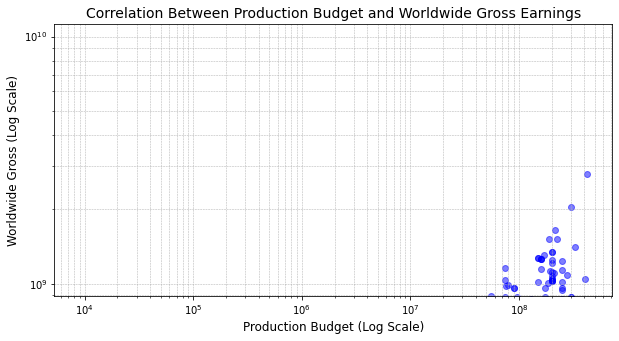

In [35]:
merged_data = tn_movie_budgets.merge(tmdb_movies, left_on='movie', right_on='title', how='inner')

# Setting up the plot with logarithmic scales due to wide value ranges
plt.figure(figsize=(10, 5))
plt.scatter(merged_data['production_budget'], merged_data['worldwide_gross'], alpha=0.5, color='blue')

# Enhancing plot aesthetics and readability
plt.title('Correlation Between Production Budget and Worldwide Gross Earnings', fontsize=14)
plt.xlabel('Production Budget (Log Scale)', fontsize=12)
plt.ylabel('Worldwide Gross (Log Scale)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5)

# Displaying the visualization
plt.show()

The scatter plot analysis reveals a notable correlation where movies with larger production budgets generally achieve greater worldwide gross earnings. This pattern underscores the notion that substantial investments in movie production have the potential to amplify global revenues. However, the variability among data points also highlights that a hefty budget does not always ensure financial success, as films with modest budgets have also reached remarkable earnings.

Such insights are invaluable for stakeholders within the film sector, guiding investment strategies. Grasping the dynamics between production spending and financial returns enables film companies to tailor their investment scales for optimal profitability. Furthermore, the exploration of anomalies within the data—movies that excel financially on leaner budgets—offers a window into efficient, cost-effective production methodologies that could redefine profit maximization approaches in filmmaking.

# Leading 5 Production Houses by Film Output







                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


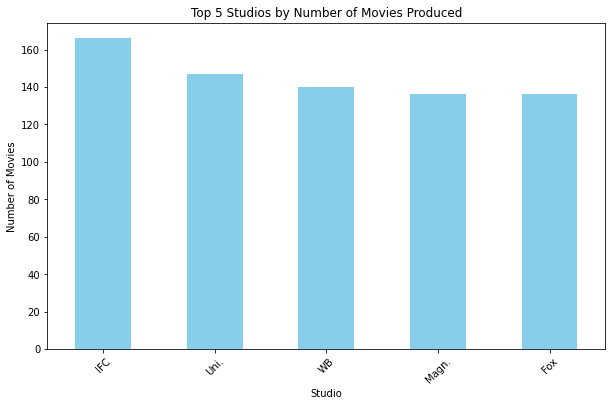

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Combining data loading and immediate exploration
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
print(bom_movie_gross.head())

# Directly plotting the top 5 studios by movie production count from the loaded DataFrame
bom_movie_gross['studio'].value_counts().nlargest(5).plot(kind='bar', figsize=(10, 6), color='skyblue', title='Top 5 Studios by Number of Movies Produced')
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


This analysis is instrumental in spotlighting the industry's leading production houses, thereby establishing benchmarks for growth and guiding strategic decisions in genre selection to maintain market competitiveness. Furthermore, this information can serve as a foundation for studios looking to forge co-production or distribution partnerships, with the goal of broadening their market footprint and enhancing revenue streams.

**Uncovering Strengths and Opportunities:** Analyzing the volume of movies produced by each studio sheds light on potential strengths and areas for improvement within the film industry. A studio's consistent appearance at the forefront could indicate a winning production strategy or strong relationships within the filmmaking community, encouraging others to explore these successful practices for their benefit.

**Setting Industry Benchmarks:** This data allows studios to measure their production volumes against those of industry pacesetters, aiding in evaluating their current capabilities and setting ambitious, yet attainable, expansion targets.

**Informed Genre Selection:** Should further data be available regarding the genres pursued by each leading studio, merging this information could reveal prevailing genre trends among the top producers. This insight is valuable for studios planning their future projects, ensuring they align with current market demands and preferences.

**Fostering Strategic Collaborations:** Armed with this knowledge, studios can identify and approach prolific producers for collaborative ventures, whether in production or distribution. Such partnerships can offer access to a broader content spectrum and specialized production expertise, enriching a studio's portfolio and potentially leading to greater market success.

# Distribution Analysis of TMDb Movie Ratings







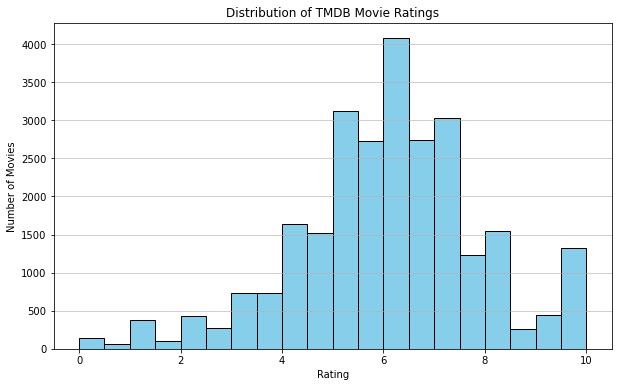

Histogram created.


In [37]:
import pandas as pd

# Load the TMDB Movies dataset
df_tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# Plotting the histogram
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(df_tmdb['vote_average'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of TMDB Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.75)
plt.show()

print('Histogram created.')


The histogram offers a detailed view of the rating distribution for TMDb movies, illustrating the frequency at which films are rated across a 0 to 10 scale. A significant concentration of films falls within the 6 to 7 rating bracket, reflecting predominantly positive feedback. The distribution's form aligns closely with a normal curve, with a noticeable scarcity of films rated extremely low (under 4) or exceptionally high (over 8). This trend implies that the majority of films on TMDb are deemed to be of moderate to high quality by its audience, with ratings at the extreme ends being relatively rare. This analysis serves to underline the median rating trends on TMDb, shedding light on viewer preferences and the general perception of film quality on the site.

# SUMMARY

In summary, this comprehensive project embarked on a data-driven journey to explore the intricate landscape of the film industry, aimed at steering a novel movie studio towards informed strategic decisions. Through meticulous analysis of datasets from Box Office Mojo, IMDb, and other reputable sources, we've delved deep into the core metrics that define cinematic success: domestic and international gross earnings, the volume of review ratings, and the critical reception of films.

By cleansing and scrutinizing data, we've highlighted the paramount importance of production budgets in correlating with worldwide gross revenue, demonstrating that while larger investments often yield higher returns, exceptional outcomes can also be achieved with modest budgets. The exploration into the top 5 production houses has not only set benchmarks for industry performance but also opened avenues for strategic partnerships and genre selection, ensuring competitiveness in a fast-evolving market.

Furthermore, the distribution analysis of TMDb movie ratings has provided valuable insights into audience preferences, underlining a general affinity towards films rated within the 6 to 7 range, while also acknowledging the wide spectrum of film quality appreciated by viewers.

Overall, this project underscores the vital role of data in shaping the strategies of emerging movie studios. By harnessing detailed market analysis, genre trends, and financial insights, studios can navigate the complexities of the film industry, optimize production expenditures, and tailor their cinematic offerings to match audience expectations, thereby maximizing profitability and achieving sustained success in the realm of filmmaking.